In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



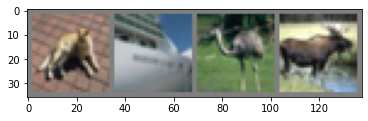

  cat  ship  bird  deer


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

2. Define a Convolutional Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net_2linear(nn.Module):
    def __init__(self):
        super().__init__()
        # 3 input image channel, 6 output channels, 5x5 square convolution. 
        self.fc1 = nn.Linear(16 *2*32*3, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc0(x))
        x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Net_3linear(nn.Module):
    def __init__(self):
        super().__init__()
        # 3 input image channel, 6 output channels, 5x5 square convolution. 
        #Three input channels are: red, green, and blue
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(3, 16, 7)
#         self.fc0 = nn.Linear(16*7*7, 16 * 5 * 5)
        self.fc1 = nn.Linear(16 *2*32*3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc0(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

 
    
class Net_4linear(nn.Module):
    def __init__(self):
        super().__init__()
        # 3 input image channel, 6 output channels, 5x5 square convolution. 
        #Three input channels are: red, green, and blue
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(3, 16, 7)
#         self.fc0 = nn.Linear(16*7*7, 16 * 5 * 5)
        self.fc1 = nn.Linear(16 *2*32*3, 256)
        self.fc1a = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc0(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc1a(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class Net_5linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(16 *2*32*3, 512)
        self.fc1a = nn.Linear(512, 256)
        self.fc1b = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc1a(x))
        x = F.relu(self.fc1b(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net1 = Net_2linear()
net2 = Net_3linear()
net3 = Net_4linear()
net4 = Net_5linear()


3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer1 = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)
optimizer2 = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)
optimizer3 = optim.SGD(net3.parameters(), lr=0.001, momentum=0.9)
optimizer4 = optim.SGD(net4.parameters(), lr=0.001, momentum=0.9)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [10]:
temp1 = []
temp2 = []
temp3 = []
temp4 = []
d = []
cols = ['Epoch', 'MiniBatch', 'Loss']
for epoch in range(10):  # loop over the dataset multiple times

    running_loss1 = 0.0
    running_loss2 = 0.0
    running_loss3 = 0.0
    running_loss4 = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer1.zero_grad()
        optimizer2.zero_grad()
        optimizer3.zero_grad()
        optimizer4.zero_grad()

        # forward + backward + optimize
        #outputs = net(inputs)
        loss1 = criterion(net1(inputs), labels)
        loss2 = criterion(net2(inputs), labels)
        loss3 = criterion(net3(inputs), labels)
        loss4 = criterion(net4(inputs), labels)
        loss1.backward()
        optimizer1.step()
        loss2.backward()
        optimizer2.step()
        loss3.backward()
        optimizer3.step()
        loss4.backward()
        optimizer4.step()

        # print statistics
        running_loss1 += loss1.item()
        running_loss2 += loss2.item()
        running_loss3 += loss3.item()
        running_loss4 += loss4.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            d.append({'Epoch':epoch+1, 'Mini Batch': i+1, 'Loss_2Linear':running_loss1/2000
                    , 'Loss_3Linear':running_loss2/2000, 'Loss_4Linear':running_loss3/2000,
                    'Loss_5Linear':running_loss4/2000})
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss1 / 2000))
            running_loss1 = 0.0
            running_loss2 = 0.0
            running_loss3 = 0.0
            running_loss4 = 0.0

print('Finished Training')

[1,  2000] loss: 1.850
[1,  4000] loss: 1.704
[1,  6000] loss: 1.660
[1,  8000] loss: 1.628
[1, 10000] loss: 1.613
[1, 12000] loss: 1.566
[2,  2000] loss: 1.510
[2,  4000] loss: 1.502
[2,  6000] loss: 1.500
[2,  8000] loss: 1.511
[2, 10000] loss: 1.507
[2, 12000] loss: 1.492
[3,  2000] loss: 1.411
[3,  4000] loss: 1.426
[3,  6000] loss: 1.437
[3,  8000] loss: 1.443
[3, 10000] loss: 1.432
[3, 12000] loss: 1.431
[4,  2000] loss: 1.351
[4,  4000] loss: 1.367
[4,  6000] loss: 1.388
[4,  8000] loss: 1.380
[4, 10000] loss: 1.387
[4, 12000] loss: 1.382
[5,  2000] loss: 1.307
[5,  4000] loss: 1.309
[5,  6000] loss: 1.336
[5,  8000] loss: 1.339
[5, 10000] loss: 1.352
[5, 12000] loss: 1.367
[6,  2000] loss: 1.245
[6,  4000] loss: 1.286
[6,  6000] loss: 1.306
[6,  8000] loss: 1.292
[6, 10000] loss: 1.315
[6, 12000] loss: 1.316
[7,  2000] loss: 1.220
[7,  4000] loss: 1.245
[7,  6000] loss: 1.274
[7,  8000] loss: 1.252
[7, 10000] loss: 1.283
[7, 12000] loss: 1.295
[8,  2000] loss: 1.168
[8,  4000] 

Let's quickly save our trained model:



In [29]:
import pandas as pd
df = pd.DataFrame(d)
df.head(70)

,Epoch,Mini Batch,Loss_2Linear,Loss_3Linear,Loss_4Linear,Loss_5Linear
0,1,2000,1.850037,1.939728,2.038805,2.207630
1,1,4000,1.704278,1.731273,1.779658,1.894362
2,1,6000,1.660180,1.668558,1.693642,1.759013
3,1,8000,1.628201,1.622775,1.639127,1.690784
4,1,10000,1.613081,1.602591,1.612403,1.647254
5,1,12000,1.565597,1.544693,1.554962,1.586585
6,2,2000,1.510417,1.485977,1.494184,1.521325
7,2,4000,1.502361,1.469434,1.476760,1.498747
8,2,6000,1.500164,1.460601,1.454367,1.469945
9,2,8000,1.511274,1.480211,1.474296,1.487048


In [22]:

# torch.save(net2.state_dict(), PATH)
# torch.save(net3.state_dict(), PATH)
# torch.save(net4.state_dict(), PATH)

See `here <https://pytorch.org/docs/stable/notes/serialization.html>`_
for more details on saving PyTorch models.

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



In [39]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)
net.to(device)

num_params1 = sum(p.numel() for p in net1.parameters() if p.requires_grad)
num_params2 = sum(p.numel() for p in net2.parameters() if p.requires_grad)
num_params3 = sum(p.numel() for p in net3.parameters() if p.requires_grad)
num_params4 = sum(p.numel() for p in net4.parameters() if p.requires_grad)
print("Number of trainable parameters:", num_params1)
print("Number of trainable parameters:", num_params2)
print("Number of trainable parameters:", num_params3)
print("Number of trainable parameters:", num_params4)

Device: cpu
Number of trainable parameters: 369970
Number of trainable parameters: 379774
Number of trainable parameters: 828542
Number of trainable parameters: 1746558


In [40]:
# optimizer = optimizer1
# net = net1
# optimizer = optimizer2
# net = net2
# optimizer = optimizer3
# net = net3
optimizer = optimizer4
net = net4
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, 
                                                 verbose=True, min_lr=0)


loss_hist, acc_hist = [], []
loss_hist_val, acc_hist_val = [], []

for epoch in range(10):
    
    
    running_loss = 0.0
    correct = 0
    for data in trainloader:
        
        batch, labels = data
        batch, labels = batch.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(batch)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # compute training statistics
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    avg_loss = running_loss / len(trainset)
    avg_acc = correct / len(trainset)
    loss_hist.append(avg_loss)
    acc_hist.append(avg_acc)

      # validation statistics
    net.eval()
    with torch.no_grad():
        
        loss_val = 0.0
        correct_val = 0
        for data in testloader:
            
            batch, labels = data
            batch, labels = batch.to(device), labels.to(device)
            outputs = net(batch)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            loss_val += loss.item()
        avg_loss_val = loss_val / len(testset)
        avg_acc_val = correct_val / len(testset)
        loss_hist_val.append(avg_loss_val)
        acc_hist_val.append(avg_acc_val)
    net.train()

    scheduler.step(avg_loss_val)
    print('[epoch %d] loss: %.5f accuracy: %.4f test loss: %.5f test accuracy: %.4f' % (epoch + 1, 
                                                                                    avg_loss, avg_acc, avg_loss_val, avg_acc_val))

[epoch 1] loss: 0.20303 accuracy: 0.7093 test loss: 0.36205 test accuracy: 0.5435
[epoch 2] loss: 0.18960 accuracy: 0.7308 test loss: 0.37056 test accuracy: 0.5463
[epoch 3] loss: 0.17863 accuracy: 0.7463 test loss: 0.36949 test accuracy: 0.5451
[epoch 4] loss: 0.16872 accuracy: 0.7602 test loss: 0.38904 test accuracy: 0.5365
[epoch 5] loss: 0.15824 accuracy: 0.7741 test loss: 0.41636 test accuracy: 0.5346
[epoch 6] loss: 0.15002 accuracy: 0.7840 test loss: 0.41615 test accuracy: 0.5327
[epoch 7] loss: 0.14202 accuracy: 0.7972 test loss: 0.44741 test accuracy: 0.5351
[epoch 8] loss: 0.13249 accuracy: 0.8123 test loss: 0.46560 test accuracy: 0.5390
[epoch 9] loss: 0.12450 accuracy: 0.8245 test loss: 0.45805 test accuracy: 0.5467
[epoch 10] loss: 0.11859 accuracy: 0.8301 test loss: 0.47987 test accuracy: 0.5401


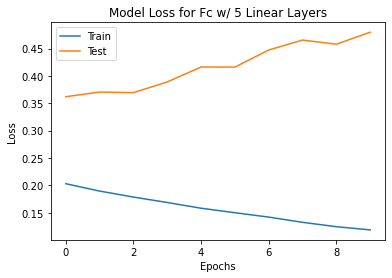

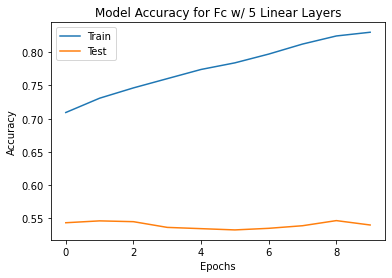

In [41]:
legend = ['Train', 'Test']
plt.plot(loss_hist)
plt.plot(loss_hist_val)
plt.title('Model Loss for Fc w/ 5 Linear Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(legend)
plt.show()

legend = ['Train', 'Test']
plt.plot(acc_hist)
plt.plot(acc_hist_val)
plt.title('Model Accuracy for Fc w/ 5 Linear Layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(legend)
plt.show()

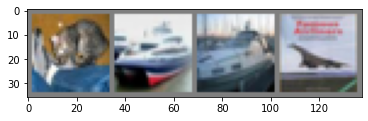

GroundTruth:    cat  ship  ship plane


In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):



In [27]:
PATH = './cifar_net.pth'
torch.save(net1.state_dict(), PATH)
net = Net_2linear()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data    
        outputs = net(images)    
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

  
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))

Predicted:    dog   cat   car truck
Accuracy of the network on the 10000 test images: 47 %
Accuracy for class plane is: 60.7 %
Accuracy for class car   is: 79.0 %
Accuracy for class bird  is: 22.8 %
Accuracy for class cat   is: 34.2 %
Accuracy for class deer  is: 24.7 %
Accuracy for class dog   is: 53.1 %
Accuracy for class frog  is: 30.9 %
Accuracy for class horse is: 63.4 %
Accuracy for class ship  is: 57.5 %
Accuracy for class truck is: 44.4 %


In [28]:
PATH = './cifar_net.pth'
torch.save(net4.state_dict(), PATH)
net = Net_5linear()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data    
        outputs = net(images)    
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

  
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))

Predicted:   frog   dog  deer horse
Accuracy of the network on the 10000 test images: 53 %
Accuracy for class plane is: 70.7 %
Accuracy for class car   is: 68.2 %
Accuracy for class bird  is: 43.8 %
Accuracy for class cat   is: 33.5 %
Accuracy for class deer  is: 45.4 %
Accuracy for class dog   is: 46.4 %
Accuracy for class frog  is: 58.5 %
Accuracy for class horse is: 60.4 %
Accuracy for class ship  is: 71.3 %
Accuracy for class truck is: 41.7 %


Okay, now let us see what the neural network thinks these examples above are:



The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



The results seem pretty good.

Let us look at how the network performs on the whole dataset.



That looks way better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:

